# QRSM Analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import QuadraticAnalysisToolkit as QAT
plt.rcParams['figure.figsize'] = (10, 6)

## Set up grid and sampling info

In [2]:
lo = [0.01, 0.3]
hi = [0.1, 0.9]
txtfile = 'grid_results_sorted.txt'
txtdelimiter = ' '
skipheader = 1

## Open CSV file with samples

In [3]:
# Open the csv file in a Grid object
fullgrid = QAT.Grid()
fullgrid.initFromTXT(txtfile, delimiter=txtdelimiter, skip_header=skipheader)

## Do QRSM Analysis

### Use Elliptical Optimization and check against a Uniformly Spaced Mesh

This carries out a QRSM analysis as well as a uniformly spaced mesh evaluation of the quadratic fit to compare against the extrema reported by the QRSM algorithm. Using `nmesh=1000` means the regularly spaced mesh will consist of `1000` values along each dimension, so the size of the mesh is `1000^N` points for `N` dimensions.

In [4]:
quada = QAT.QuadraticAnalysis(fullgrid, lo, hi, nmesh=1000)

/home/eugene/codes/astro/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:518: RuntimeWarning: divide by zero encountered in double_scalars
  f += hp**2 / (4. * (mup + x)**2)


Let's print out the quadratic fit coefficients with 1 standard deviation fit errors:

In [5]:
print(quada.qfit)

f(x) = (0.5341903322416409 +/- 0.004338652087132339) + 
       (-0.5764844977605628 +/- 0.06532898297483357) x[0] + 
       (0.17527405435525528 +/- 0.012620982257938297) x[1] + 
       (0.3455203734311024 +/- 0.058009606374026364) x[0] * x[1] + 
       (1.9682715326905906 +/- 0.4349894342744105) x[0]**2 + 
       (-0.2384115397357862 +/- 0.009852511309775078) x[1]**2

Sum of squares of residuals: 0.0030886085673288493
Coefficient of determination (R^2): 0.9572053897185547


And now let's print the bounds of the elliptic optimization:

In [6]:
print(quada.eopt)

Inner Bounds: [0.4901432128468637, 0.5585477253606713]
Inner Bounds: [0.4901914296940155, 0.5585440089924762] (Mesh)
Outer Bounds: [0.4573072463133315, 0.5669154322721325]
Outer Bounds: [0.4575522763833922, 0.5669089488329921] (Mesh)


### Use Rectangular Optimization

In [7]:
quada_rect = QAT.QuadraticAnalysis(fullgrid, lo, hi, method='rectangular')

And now let's print the bounds of the rectangular optimization:

In [8]:
print(quada_rect.ropt)

Rectangular Bounds: [0.48986922512751463, 0.5621191700357951]



## Plot Results

In [9]:
data = []
data.append(dict(label='QRSM (Inner, Optimum)', xlo=quada.eopt.inner_min, xhi=quada.eopt.inner_max, color='m'))
data.append(dict(label='QRSM (Inner, $10^6$ pt.)', xlo=quada.eopt.mesh_inner_min, xhi=quada.eopt.mesh_inner_max, color='m', linestyle=':'))
data.append(dict(label='QRSM (Outer, Optimum)', xlo=quada.eopt.outer_min, xhi=quada.eopt.outer_max, color='m'))
data.append(dict(label='QRSM (Outer, $10^6$ pt.)', xlo=quada.eopt.mesh_outer_min, xhi=quada.eopt.mesh_outer_max, color='m', linestyle=':'))
data.append(dict(label='Rectangular Optimization', xlo=quada_rect.ropt.min_function, xhi=quada_rect.ropt.max_function, color='g'))

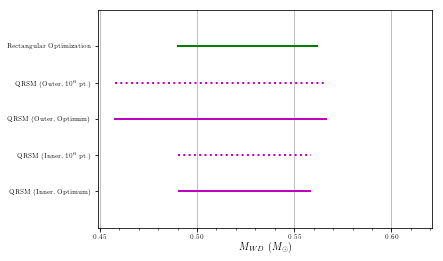

In [10]:
def plot_interval(ypos, xlo, xhi, color='b', linestyle='-', lw=2, label=None):
    plt.hlines(ypos, xlo, xhi, color, linestyle=linestyle, lw=lw)
    
def get_data_extrema(ddict):
    xlos = []
    xhis = []
    for di in ddict:
        xlos.append(di['xlo'])
        xhis.append(di['xhi'])
    xlo = np.amin(xlos)
    xhi = np.amax(xhis)
    return xlo, xhi

nlabels = len(data)

for i, d in enumerate(data):
    d['ypos'] = float(i+1)/float(nlabels+1)
    plot_interval(**d)

ax = plt.gca()

dlo, dhi = get_data_extrema(data)
eps = 0.01*(dhi-dlo)

ypos = [d['ypos'] for d in data]
labs = [d['label'] for d in data]

plt.yticks(ypos, labs)
plt.ylim(0,1)

xticks_major = np.arange(0.45, 0.70, 0.05)
xticks_minor = np.arange(0.45, 0.70, 0.01)

# Large major labels
ax.tick_params(axis = 'both', which = 'major', labelsize = 6)

# No minor labels
ax.tick_params(axis = 'both', which = 'minor', labelsize = 0)

# Set Major and Minor xticks
ax.set_xticks(xticks_major)
ax.set_xticks(xticks_minor, minor = True)

# Direct ticks outside
ax.tick_params(which = 'both', direction = 'out')

# Reset x limit
plt.xlim(0.45-eps, 0.62+eps)

# Draw x axis grids
ax.xaxis.grid(True)

plt.xlabel('$M_{WD}~(M_{\odot})$')
plt.savefig('cfintervals_with_rectangle.png', bbox_inches='tight', dpi=300)
plt.show()